# Naive Bayes' Classifier - Spam Detection

### Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://github.com/codebasics/py/raw/master/ML/14_naive_bayes/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
df['Spam'] = [1 if x == 'spam' else 0 for x in df['Category']]
df = df.drop('Category', axis=1)
df.head()

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


### Modelling

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Spam'])

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train.values)
X_train_vectors.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

MultinomialNB()

### Evaluation

In [10]:
X_test_vectors = vectorizer.transform(X_test.values)
model.score(X_test_vectors, y_test)

0.9856424982053122

In [12]:
import numpy as np

pd.DataFrame({
    'Sentence': X_test[:10],
    'Predicted': model.predict(X_test_vectors[:10]), 
    'Probability': [np.max(x) for x in model.predict_proba(X_test_vectors[:10])],
    'Truth': y_test[:10]
}) 

,Sentence,Predicted,Probability,Truth
3468,URGENT! We are trying to contact U. Todays dra...,1,1.000000,1
1172,Got what it takes 2 take part in the WRC Rally...,0,0.978563,1
447,"Well done, blimey, exercise, yeah, i kinda rem...",0,1.000000,0
4845,YOU HAVE WON! As a valued Vodafone customer ou...,1,1.000000,1
2817,Genius what's up. How your brother. Pls send h...,0,0.999999,0
3329,No we put party 7 days a week and study lightl...,0,1.000000,0
286,"K, I might come by tonight then if my class le...",0,1.000000,0
3155,Not heard from U4 a while. Call 4 rude chat pr...,1,0.997682,1
3463,Bloomberg -Message center +447797706009 Why wa...,1,0.988074,1
3535,Good evening! How are you?,0,0.999949,0


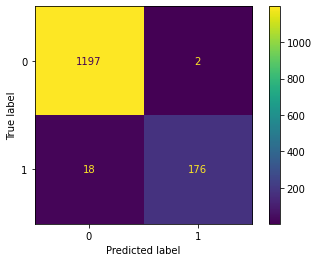

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay as CM
CM.from_predictions(y_test, model.predict(X_test_vectors))
plt.show()